In [101]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,RadiusNeighborsClassifier,KernelDensity
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.model_selection import train_test_split


## 1. Сгенерировать данные, повторяющие примеры из лекций (U-образные, концентрические окружности, XOR, с выбросами), и реализовать на них различные версии метода k ближайших соседей в задачах классификации и регрессии, включая радиусный классификатор, взвешенные методы k ближайших соседей и ядерные функции.

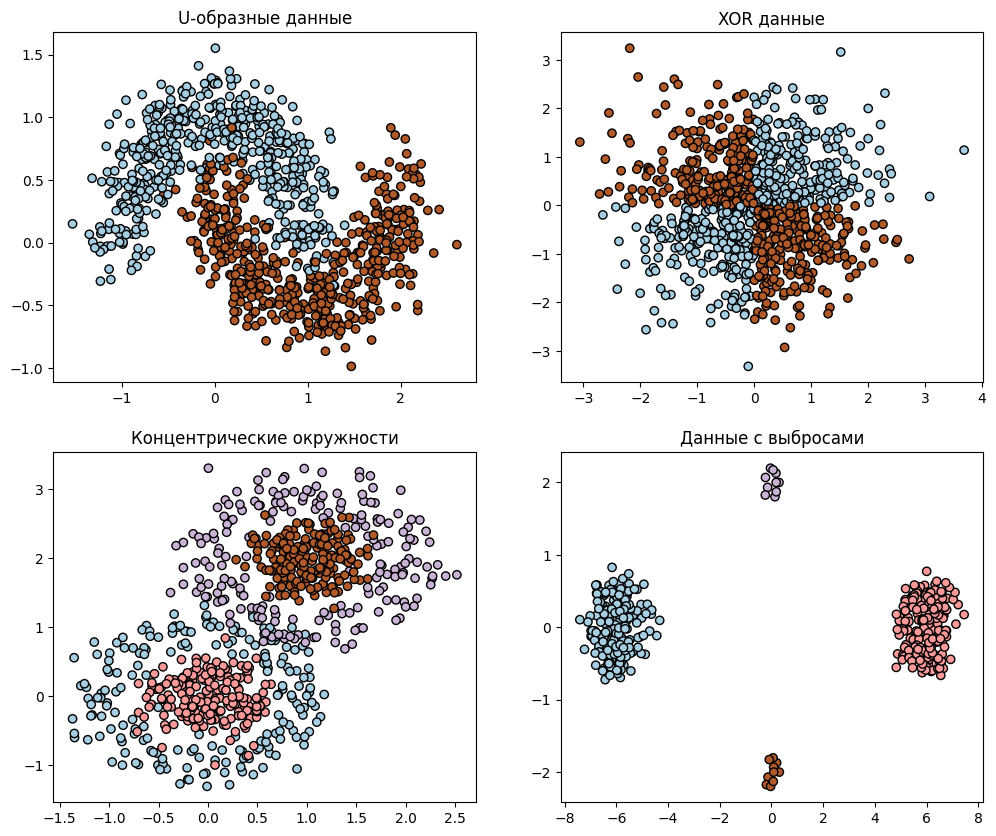

In [57]:
# Генерация U-образных данных
X_u, y_u = datasets.make_moons(n_samples=1000, noise=.2)

# Генерация XOR данных
X_xor = np.random.randn(1000, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)

#Генерация концентрических окружностей
centers = np.array([[0, 0], [0, 0], [1, 2], [1, 2]])
radii = np.array([1, 0.3, 1, 0.3])
data = []
labels = []

for i in range(len(centers)):
    theta = np.linspace(0, 2*np.pi, 200)
    x = centers[i, 0] + radii[i] * np.cos(theta) + np.random.normal(0, 0.2, size=200)
    y = centers[i, 1] + radii[i] * np.sin(theta) + np.random.normal(0, 0.2, size=200)
    data.append(np.column_stack((x, y)))
    labels.append(np.full(200, i))

data = np.concatenate(data, axis=0)
labels = np.concatenate(labels, axis=0)


#Генераия данных с выбрасами
centers1 = np.array([[-6, 0], [6, 0], [0, 2], [0, -2]])
radii1 = np.array([0.5, 0.5, 0.2, 0.2])
data1 = []
labels1 = []

for i in range(len(centers1)-2):
    theta1 = np.linspace(0, 2*np.pi, 200)
    x = centers1[i, 0] + radii1[i] * np.cos(theta1) + np.random.normal(0, 0.4, size=200)
    y = centers1[i, 1] + radii1[i] * np.sin(theta1) + np.random.normal(0, 0.1, size=200)
    data1.append(np.column_stack((x, y)))
    labels1.append(np.full(200, i))
for i in range(2,len(centers1)):
    theta1 = np.linspace(0, 2*np.pi, 10)
    x = centers1[i, 0] + radii1[i] * np.cos(theta1) + np.random.normal(0, 0.1, size=10)
    y = centers1[i, 1] + radii1[i] * np.sin(theta1) + np.random.normal(0, 0, size=10)
    data1.append(np.column_stack((x, y)))
    labels1.append(np.full(10, i))

data1 = np.concatenate(data1, axis=0)
labels1 = np.concatenate(labels1, axis=0)

# Визуализация данных
plt.figure(figsize=(12, 10))

plt.subplot(2, 2,1)
plt.scatter(X_u[:, 0], X_u[:, 1], c=y_u, cmap=plt.cm.Paired, edgecolors='k')
plt.title("U-образные данные")

plt.subplot(2, 2, 2 )
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap=plt.cm.Paired, edgecolors='k')
plt.title("XOR данные")

plt.subplot(2, 2, 3)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Paired, edgecolors='k')
plt.title("Концентрические окружности")

plt.subplot(2, 2, 4)
plt.scatter(data1[:, 0], data1[:, 1], c=labels1, cmap=plt.cm.Paired, edgecolors='k')
plt.title("Данные с выбросами")

plt.show()

Text(0, 0.5, 'Dimension 2')

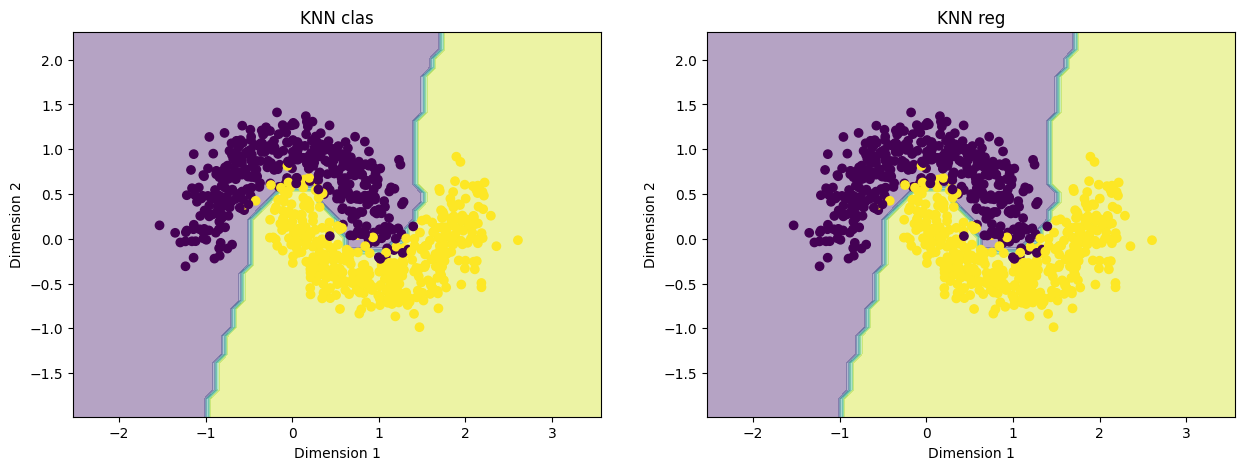

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_u, y_u,test_size=0.8)

# Реализация метода k ближайших соседей
k = 5

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
plt.figure(figsize=(15, 5))
# Классификация
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, y_pred, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('KNN clas')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Регрессия
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

y_pred_reg = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred_reg = y_pred.reshape(xx.shape)

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, y_pred, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('KNN reg')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Text(0, 0.5, 'Dimension 2')

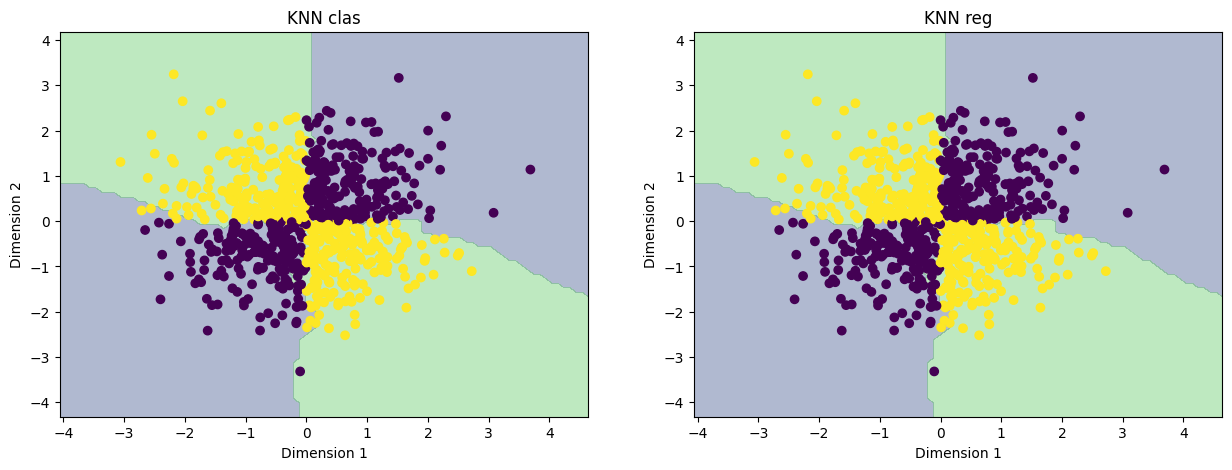

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_xor,y_xor,test_size=0.8)

# Реализация метода k ближайших соседей
k = 5

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
plt.figure(figsize=(15, 5))
# Классификация
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, y_pred, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('KNN clas')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Регрессия
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

y_pred_reg = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred_reg = y_pred.reshape(xx.shape)

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, y_pred, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('KNN reg')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Text(0, 0.5, 'Dimension 2')

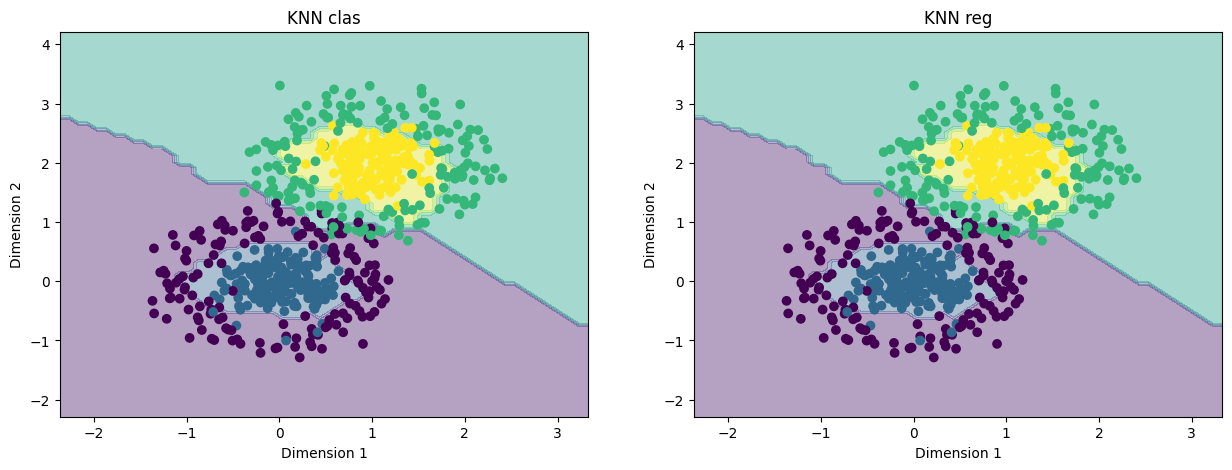

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data, labels,test_size=0.8)

# Реализация метода k ближайших соседей
k = 5

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
plt.figure(figsize=(15, 5))
# Классификация
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, y_pred, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('KNN clas')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Регрессия
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

y_pred_reg = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred_reg = y_pred.reshape(xx.shape)

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, y_pred, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('KNN reg')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Text(0, 0.5, 'Dimension 2')

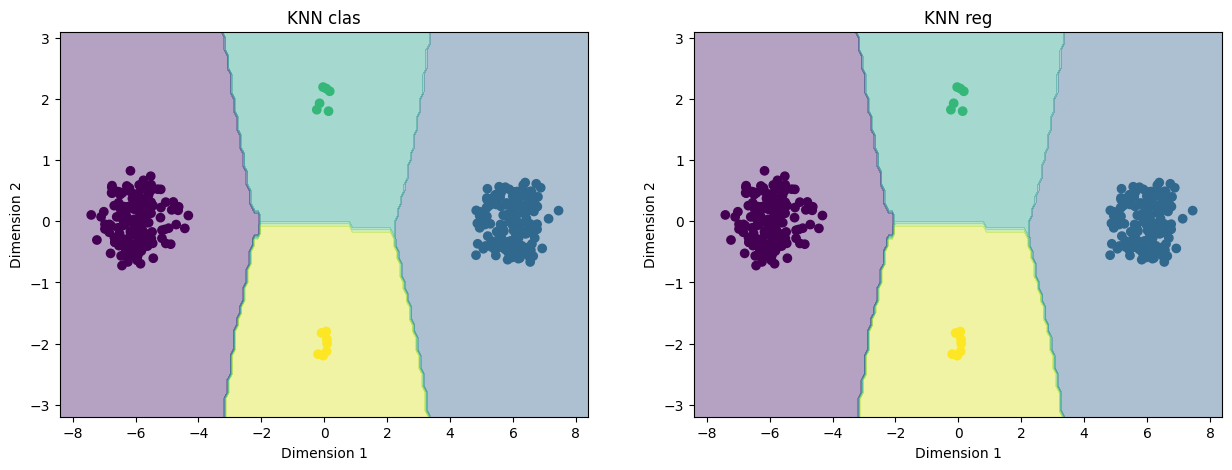

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data1, labels1,test_size=0.8)

# Реализация метода k ближайших соседей
k = 5

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
plt.figure(figsize=(15, 5))
# Классификация
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, y_pred, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('KNN clas')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Регрессия
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

y_pred_reg = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred_reg = y_pred.reshape(xx.shape)

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, y_pred, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('KNN reg')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Text(0, 0.5, 'Dimension 2')

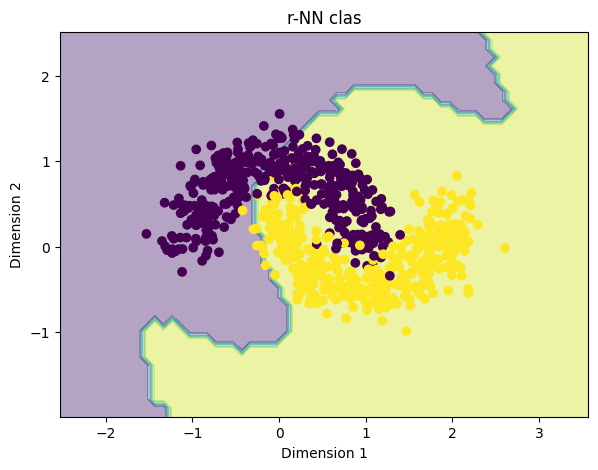

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_u, y_u,test_size=0.8)

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
plt.figure(figsize=(15, 5))
# Классификация
knn_classifier = RadiusNeighborsClassifier(radius=2.35)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, y_pred, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('r-NN clas')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


Text(0, 0.5, 'Dimension 2')

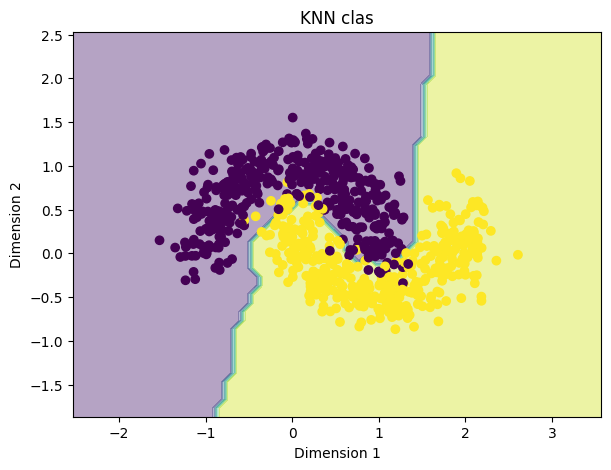

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_u, y_u,test_size=0.8)

# Реализация метода k ближайших соседей
k = 5

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
plt.figure(figsize=(15, 5))
# Классификация
knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, y_pred, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('Взвешенный KNN clas')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_u, y_u,test_size=0.8)

# Реализация метода k ближайших соседей
k = 5

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
plt.figure(figsize=(15, 5))
# Классификация
knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', kernel='rbf')
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, y_pred, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('Взвешенный KNN clas')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


TypeError: ignored

<Figure size 1500x500 with 0 Axes>

## 2. Применить метод k ближайших соседей для решения задач классификации и регрессии с использованием собственных пользовательских данных.

In [115]:
df = pd.read_csv('ign.csv')
df.dropna(inplace=True)
df.drop(['url', 'Unnamed: 0', 'title','platform','genre'], axis= 1 , inplace= True )
patterns = {
    "N": 0,
    "Y": 1,
    'Amazing':8,
    'Awful':2,
    'Bad':3,
    'Disaster':0,
    'Good':6,
    'Great':7,
    "Masterpiece":9,
    "Mediocre":4,
    "Okay":5,
    "Painful":1,
    "Unbearable":0
}
df = df.replace(patterns)


InvalidIndexError: ignored

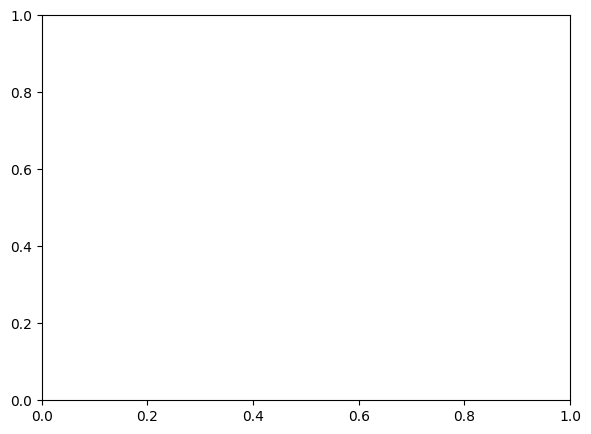

In [116]:
X = df.drop('editors_choice', axis=1)
y = df['editors_choice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

# Реализация метода k ближайших соседей
k = 5

plt.figure(figsize=(15, 5))
# Классификация
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)


plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('KNN clas')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')



##3. Сгенерировать данные, повторяющие пример из лекций для полиномиального обогащения и реализовать решение задачи классификации с использованием метода опорных векторов.

## 4. Реализовать метод опорных векторов для различных ядерных функций для классификации модельных и реальных пользовательских данных.

##5. Реализовать регрессионную версию метода опорных векторов и применить к собственным пользовательским данным.